In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [5]:
#import librarires
!pip install keras-tuner --upgrade
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle
import imageio
import cv2
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
# import the module
from keras.models import Model

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet import MobileNet
#from tensorflow.keras.applications.vgg19 import preprocess_input

Defaulting to user installation because normal site-packages is not writeable


In [7]:
# changing dir and loading images in the folder

filepath = "C:\\Users\\CyberOps\\PhD\\balanceddata"
os.chdir(filepath)

os.chdir(filepath)

onlyfiles = os.listdir()
len(onlyfiles)

11700

In [8]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]


In [9]:
print(len(age))

11700


In [10]:
X_data =[]
for file in onlyfiles:
  if(file !="model.png"):
      img=imageio.imread(file,pilmode="RGB")
      img =cv2.resize(img, (120,120))
      X_data.append(img)

C:\Users\CyberOps\AppData\Local\Temp\ipykernel_17444\3754214948.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(file,pilmode="RGB")


In [45]:
X = np.squeeze(X_data)
X.shape


(11700, 120, 120, 3)

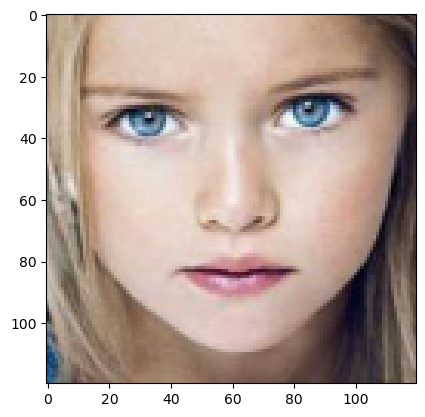

In [11]:
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [46]:
# normalize data
X = X.astype('float32')
X /= 255


In [47]:
ages = pd.Series(age, name='Age').astype(np.int)

C:\Users\CyberOps\AppData\Local\Temp\ipykernel_17444\600970202.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ages = pd.Series(age, name='Age').astype(np.int)


In [48]:
ages.dtype

dtype('int32')

In [49]:
X.shape

(11700, 120, 120, 3)

In [50]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train_reg, y_test_reg  = train_test_split(X, ages, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test,y_val_reg, y_test_reg= train_test_split(x_test,  y_test_reg,test_size=test_ratio/(test_ratio + validation_ratio))

print("Training Image Size", x_train.shape," Validation Image Size", x_val.shape, "Testing Image Size ",x_test.shape)
print("Training Label Size",y_train_reg.shape, "validation Label Size",y_val_reg.shape, "Testing Image Size",y_test_reg.shape)


Training Image Size (8189, 120, 120, 3)  Validation Image Size (2340, 120, 120, 3) Testing Image Size  (1171, 120, 120, 3)
Training Label Size (8189,) validation Label Size (2340,) Testing Image Size (1171,)


In [51]:
shape=x_train[0]

In [52]:
ages.shape

(11700,)

In [53]:
## Loading VGG16 model
vgg16_model = VGG16(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
vgg16_model.trainable = False ## Not trainable weights

In [54]:
mobilenet_model = MobileNet(input_shape=x_train[0].shape, 
                                 include_top = False, 
                                 weights ="imagenet" )
mobilenet_model .trainable = False ## Not trainable weights

In [55]:
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 60, 60, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 60, 60, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 60, 60, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 60, 60, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 60, 60, 32)       128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 7, 7, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 7, 7, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 7, 7, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 7, 7, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 7, 7, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 7, 7, 512)         262144    
                                                                 
 conv_pw_9

In [56]:
# layers of vgg16
mobilenet_layer_list = mobilenet_model.layers
for i in mobilenet_layer_list:
    print(i)

In [57]:
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 60, 60, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 60, 60, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 60, 60, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 60, 60, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 60, 60, 32)       128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 7, 7, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 7, 7, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 7, 7, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 7, 7, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 7, 7, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 7, 7, 512)         262144    
                                                                 
 conv_pw_9

In [58]:
# Freeze four convolution blocks
for layer in mobilenet_model.layers[:10]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(mobilenet_model.layers):
    print(i, layer.name, layer.trainable)


0 input_2 False
1 conv1 False
2 conv1_bn False
3 conv1_relu False
4 conv_dw_1 False
5 conv_dw_1_bn False
6 conv_dw_1_relu False
7 conv_pw_1 False
8 conv_pw_1_bn False
9 conv_pw_1_relu False
10 conv_pad_2 False
11 conv_dw_2 False
12 conv_dw_2_bn False
13 conv_dw_2_relu False
14 conv_pw_2 False
15 conv_pw_2_bn False
16 conv_pw_2_relu False
17 conv_dw_3 False
18 conv_dw_3_bn False
19 conv_dw_3_relu False
20 conv_pw_3 False
21 conv_pw_3_bn False
22 conv_pw_3_relu False
23 conv_pad_4 False
24 conv_dw_4 False
25 conv_dw_4_bn False
26 conv_dw_4_relu False
27 conv_pw_4 False
28 conv_pw_4_bn False
29 conv_pw_4_relu False
30 conv_dw_5 False
31 conv_dw_5_bn False
32 conv_dw_5_relu False
33 conv_pw_5 False
34 conv_pw_5_bn False
35 conv_pw_5_relu False
36 conv_pad_6 False
37 conv_dw_6 False
38 conv_dw_6_bn False
39 conv_dw_6_relu False
40 conv_pw_6 False
41 conv_pw_6_bn False
42 conv_pw_6_relu False
43 conv_dw_7 False
44 conv_dw_7_bn False
45 conv_dw_7_relu False
46 conv_pw_7 False
47 conv_pw_7_bn 

In [59]:
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 60, 60, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 60, 60, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 60, 60, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 60, 60, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 60, 60, 32)       128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 7, 7, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 7, 7, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 7, 7, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 7, 7, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 7, 7, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 7, 7, 512)         262144    
                                                                 
 conv_pw_9

In [60]:
from tensorflow.keras import layers, models


flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

prediction_layer = layers.Dense(1, activation='linear')


vgg16_net_model = models.Sequential([
 vgg16_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
  prediction_layer
])

In [61]:
vgg16_net_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)



In [62]:
input_shape = X.shape  
vgg16_net_model.build(input_shape) 
vgg16_net_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_20 (Dense)            (None, 64)                294976    
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 1)                 1

In [63]:
vgg16_net_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_20 (Dense)            (None, 64)                294976    
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 1)                 1

In [64]:

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
model_historyA=vgg16_net_model.fit(x_train,y_train_reg, batch_size=32,epochs=20,validation_data=(x_val, y_val_reg),callbacks=[early_stopping])




Epoch 1/20
256/256 [==============================] - 657s 3s/step - loss: 44.0894 - mae: 5.2369 - val_loss: 27.6728 - val_mae: 4.2200
Epoch 2/20
256/256 [==============================] - 823s 3s/step - loss: 25.9116 - mae: 4.0203 - val_loss: 23.6529 - val_mae: 3.7895
Epoch 3/20
256/256 [==============================] - 876s 3s/step - loss: 21.1490 - mae: 3.5953 - val_loss: 20.7971 - val_mae: 3.5373
Epoch 4/20
256/256 [==============================] - 802s 3s/step - loss: 17.3959 - mae: 3.2322 - val_loss: 19.4010 - val_mae: 3.4548
Epoch 5/20
256/256 [==============================] - 738s 3s/step - loss: 14.7539 - mae: 2.9556 - val_loss: 18.2428 - val_mae: 3.2542
Epoch 6/20
256/256 [==============================] - 816s 3s/step - loss: 12.6402 - mae: 2.7003 - val_loss: 16.3758 - val_mae: 3.0220
Epoch 7/20
256/256 [==============================] - 682s 3s/step - loss: 10.3749 - mae: 2.4566 - val_loss: 17.3499 - val_mae: 3.1871
Epoch 8/20
256/256 [==============================] - 6

In [65]:
true_ages = y_test_reg
predicted_ages = np.squeeze(vgg16_net_model.predict(x_test))


# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,predicted_ages)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(true_ages ,predicted_ages)
print ("The MAE",mae)


rmse = np.sqrt(mse)

print ("this is the rmse",rmse )
true_ages = y_test_reg


r2 = r2_score(true_ages, predicted_ages)
print("Test R^2 Score: {:.5f}".format(r2))

37/37 [==============================] - 72s 2s/step
The MSE 13.900298470751176
The MAE 2.4434571632658897
this is the rmse 3.728310404291893
Test R^2 Score: 0.75651


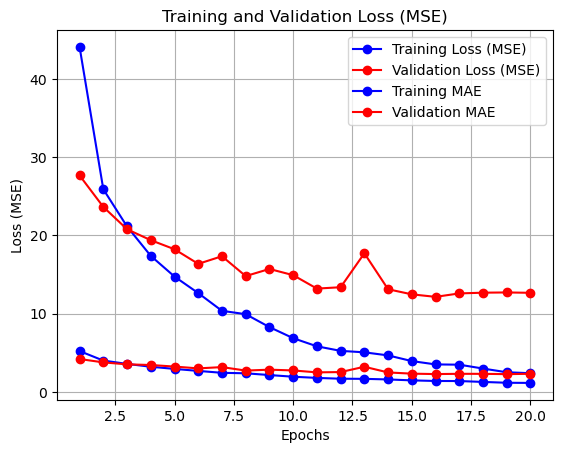

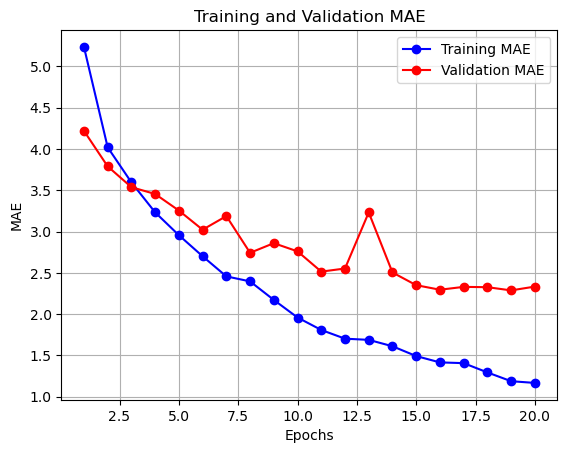

In [100]:
import matplotlib.pyplot as plt

# Training history data
history = {
    'loss': [44.0894, 25.9116, 21.1490, 17.3959, 14.7539, 12.6402, 10.3749, 9.9470, 8.2975, 6.8808, 5.8426, 5.2611, 5.0735, 4.6817, 3.9545, 3.5302, 3.4962, 3.0002, 2.5276, 2.4065],
    'val_loss': [27.6728, 23.6529, 20.7971, 19.4010, 18.2428, 16.3758, 17.3499, 14.8134, 15.7226, 14.9326, 13.2153, 13.3917, 17.7261, 13.1309, 12.4817, 12.1609, 12.5995, 12.6935, 12.7238, 12.6776],
    'mae': [5.2369, 4.0203, 3.5953, 3.2322, 2.9556, 2.7003, 2.4566, 2.3957, 2.1713, 1.9580, 1.8071, 1.7017, 1.6873, 1.6098, 1.4909, 1.4141, 1.4052, 1.2928, 1.1863, 1.1655],
    'val_mae': [4.2200, 3.7895, 3.5373, 3.4548, 3.2542, 3.0220, 3.1871, 2.7422, 2.8589, 2.7596, 2.5142, 2.5519, 3.2315, 2.5038, 2.3499, 2.2948, 2.3293, 2.3255, 2.2868, 2.3328]
}

epochs = range(1, len(history['loss']) + 1)

# Plotting loss (MSE)
plt.plot(epochs, history['loss'], 'bo-', label='Training Loss (MSE)')
plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss (MSE)')
plt.plot(epochs, history['mae'], 'bo-', label='Training MAE')
plt.plot(epochs, history['val_mae'], 'ro-', label='Validation MAE')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting MAE
plt.plot(epochs, history['mae'], 'bo-', label='Training MAE')
plt.plot(epochs, history['val_mae'], 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
vgg16_net_model.save("../model/Vgg_model.h5", include_optimizer=True)

In [67]:
vgg19_model = VGG19(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
vgg19_model.trainable = False ## Not trainable weights

In [68]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 120, 120, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 120, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 60, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 60, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 60, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 30, 128)       0     

In [69]:


flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

prediction_layer = layers.Dense(1, activation='linear')


vgg19_net_model = models.Sequential([
  vgg19_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
  prediction_layer
])


In [70]:
vgg19_net_model.summary()

vgg19_net_model.compile(optimizer="adam", loss="mse", metrics="mae")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 3, 3, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_25 (Dense)            (None, 64)                294976    
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 128)               8320      
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 1)                

In [71]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
model_historyB=vgg19_net_model.fit(x_train,y_train_reg, batch_size=32,epochs=20,validation_data=(x_val, y_val_reg),callbacks=[early_stopping])


Epoch 1/20
256/256 [==============================] - 798s 3s/step - loss: 41.6386 - mae: 5.0531 - val_loss: 28.3016 - val_mae: 4.2396
Epoch 2/20
256/256 [==============================] - 794s 3s/step - loss: 26.5664 - mae: 4.0222 - val_loss: 26.4796 - val_mae: 4.0188
Epoch 3/20
256/256 [==============================] - 793s 3s/step - loss: 22.5228 - mae: 3.6750 - val_loss: 22.7945 - val_mae: 3.6676
Epoch 4/20
256/256 [==============================] - 794s 3s/step - loss: 20.0035 - mae: 3.4410 - val_loss: 20.7268 - val_mae: 3.4189
Epoch 5/20
256/256 [==============================] - 793s 3s/step - loss: 16.8350 - mae: 3.1237 - val_loss: 20.3132 - val_mae: 3.4416
Epoch 6/20
256/256 [==============================] - 793s 3s/step - loss: 17.6378 - mae: 3.2059 - val_loss: 20.7889 - val_mae: 3.4526
Epoch 7/20
256/256 [==============================] - 789s 3s/step - loss: 15.0880 - mae: 2.9488 - val_loss: 18.3281 - val_mae: 3.2154
Epoch 8/20
256/256 [==============================] - 7

In [72]:
true_ages = y_test_reg
predicted_ages = np.squeeze(vgg19_net_model.predict(x_test))


# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,predicted_ages)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(true_ages ,predicted_ages)
print ("The MAE",mae)


rmse = np.sqrt(mse)

print ("this is the rmse",rmse )
true_ages = y_test_reg


r2 = r2_score(true_ages, predicted_ages)
print("Test R^2 Score: {:.5f}".format(r2))

37/37 [==============================] - 90s 2s/step
The MSE 14.083253380909555
The MAE 2.499646659593721
this is the rmse 3.7527660972820507
Test R^2 Score: 0.75331


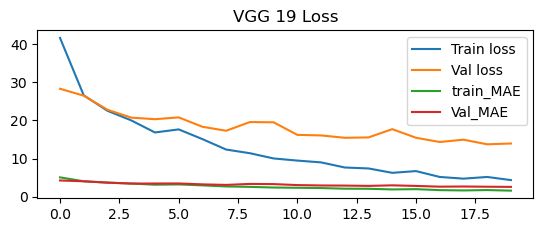

In [91]:
# plot loss during training
plt.subplot(211)
plt.title('VGG 19 Loss')
plt.plot(model_historyB.history['loss'], label='Train loss')
plt.plot(model_historyB.history['val_loss'], label='Val loss')
plt.plot(model_historyB.history['mae'], label='train_MAE')
plt.plot(model_historyB.history['val_mae'], label='Val_MAE')
plt.legend()
plt.legend()


In [73]:
vgg19_net_model.save("../model/vgg19_model.h5", include_optimizer=True)

In [74]:
resnet50model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False,  input_shape=x_train[0].shape)
for layer in resnet50model.layers:
  layer.trainable = False




In [75]:
resnet50model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 126, 126, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 60, 60, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 60, 60, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 30, 30, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 30, 30, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 30, 30, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 30, 30, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 15, 15, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 15, 15, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 15, 15, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 15, 15, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [76]:
from tensorflow.keras import layers, models




flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

prediction_layer = layers.Dense(1, activation='linear')


ResNet50_model = models.Sequential([
    resnet50model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
  prediction_layer
])

In [77]:
ResNet50_model.summary()
ResNet50_model.compile(optimizer="adam", loss="mse", metrics="mae")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0         
                                                                 
 dense_30 (Dense)            (None, 64)                2097216   
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 128)               8320      
                                                                 
 dense_33 (Dense)            (None, 128)               16512     
                                                                 
 dense_34 (Dense)            (None, 1)                

In [78]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
model_historyC=ResNet50_model.fit(x_train,y_train_reg, batch_size=32,epochs=20,validation_data=(x_test, y_test_reg),callbacks=[early_stopping])


Epoch 1/20
256/256 [==============================] - 300s 1s/step - loss: 61.7062 - mae: 6.6189 - val_loss: 51.9024 - val_mae: 6.2349
Epoch 2/20
256/256 [==============================] - 256s 999ms/step - loss: 48.7261 - mae: 5.8622 - val_loss: 49.3712 - val_mae: 5.8386
Epoch 3/20
256/256 [==============================] - 235s 917ms/step - loss: 44.4041 - mae: 5.5145 - val_loss: 43.7638 - val_mae: 5.4954
Epoch 4/20
256/256 [==============================] - 243s 948ms/step - loss: 40.4877 - mae: 5.2296 - val_loss: 42.6633 - val_mae: 5.3221
Epoch 5/20
256/256 [==============================] - 235s 918ms/step - loss: 40.5865 - mae: 5.1959 - val_loss: 39.4328 - val_mae: 5.1384
Epoch 6/20
256/256 [==============================] - 235s 918ms/step - loss: 38.1360 - mae: 5.0122 - val_loss: 38.7973 - val_mae: 5.0572
Epoch 7/20
256/256 [==============================] - 239s 934ms/step - loss: 37.9766 - mae: 5.0026 - val_loss: 39.5612 - val_mae: 5.0131
Epoch 8/20
256/256 [=================

In [79]:
true_ages = y_test_reg
predicted_ages = np.squeeze(ResNet50_model.predict(x_test))


# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,predicted_ages)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(true_ages ,predicted_ages)
print ("The MAE",mae)


rmse = np.sqrt(mse)

print ("this is the rmse",rmse )
true_ages = y_test_reg


r2 = r2_score(true_ages, predicted_ages)
print("Test R^2 Score: {:.5f}".format(r2))

37/37 [==============================] - 29s 757ms/step
The MSE 35.78573418867663
The MAE 4.809022341906566
this is the rmse 5.982117868169819
Test R^2 Score: 0.37316


In [80]:
ResNet50_model.save("../model/resnet50_model.h5", include_optimizer=True)

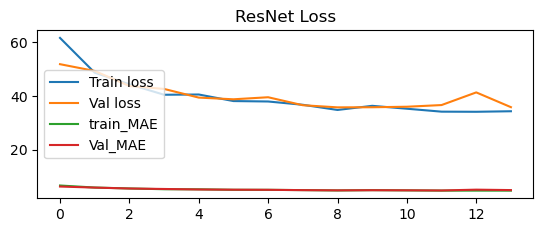

In [90]:
# plot loss during training
plt.subplot(211)
plt.title('ResNet Loss')
plt.plot(model_historyC.history['loss'], label='Train loss')
plt.plot(model_historyC.history['val_loss'], label='Val loss')
plt.plot(model_historyC.history['mae'], label='train_MAE')
plt.plot(model_historyC.history['val_mae'], label='Val_MAE')
plt.legend()
plt.legend()


In [82]:
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 60, 60, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 60, 60, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 60, 60, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 60, 60, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 60, 60, 32)       128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 7, 7, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 7, 7, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 7, 7, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 7, 7, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 7, 7, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 7, 7, 512)         262144    
                                                                 
 conv_pw_9

In [83]:
from tensorflow.keras import layers, models




flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

prediction_layer = layers.Dense(1, activation='linear')


mobilNet_model = models.Sequential([
    mobilenet_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
  prediction_layer
])

In [84]:
mobilNet_model.compile(optimizer="adam", loss="mse", metrics="mae")


In [85]:
mobilNet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 3, 3, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_35 (Dense)            (None, 64)                589888    
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 128)               8320      
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                      

In [86]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
model_historyA=mobilNet_model.fit(x_train,y_train_reg, batch_size=32,epochs=20,validation_data=(x_val, y_val_reg),callbacks=[early_stopping])


Epoch 1/20
256/256 [==============================] - 66s 249ms/step - loss: 33.2305 - mae: 4.4352 - val_loss: 22.3308 - val_mae: 3.7624
Epoch 2/20
256/256 [==============================] - 59s 229ms/step - loss: 19.0447 - mae: 3.3816 - val_loss: 18.5792 - val_mae: 3.3946
Epoch 3/20
256/256 [==============================] - 64s 249ms/step - loss: 13.2723 - mae: 2.7749 - val_loss: 17.4459 - val_mae: 3.2228
Epoch 4/20
256/256 [==============================] - 63s 247ms/step - loss: 10.0393 - mae: 2.3799 - val_loss: 14.4807 - val_mae: 2.7630
Epoch 5/20
256/256 [==============================] - 59s 232ms/step - loss: 6.8270 - mae: 1.9755 - val_loss: 13.0883 - val_mae: 2.5636
Epoch 6/20
256/256 [==============================] - 58s 226ms/step - loss: 5.2595 - mae: 1.7277 - val_loss: 18.6740 - val_mae: 3.1515
Epoch 7/20
256/256 [==============================] - 58s 226ms/step - loss: 4.9802 - mae: 1.6819 - val_loss: 11.3288 - val_mae: 2.2951
Epoch 8/20
256/256 [========================

In [87]:
true_ages = y_test_reg
predicted_ages = np.squeeze(mobilNet_model.predict(x_test))


# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,predicted_ages)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(true_ages ,predicted_ages)
print ("The MAE",mae)


rmse = np.sqrt(mse)

print ("this is the rmse",rmse )
true_ages = y_test_reg


r2 = r2_score(true_ages, predicted_ages)
print("Test R^2 Score: {:.5f}".format(r2))

37/37 [==============================] - 7s 170ms/step
The MSE 9.460707044106952
The MAE 1.799654788791777
this is the rmse 3.0758262376322483
Test R^2 Score: 0.83428


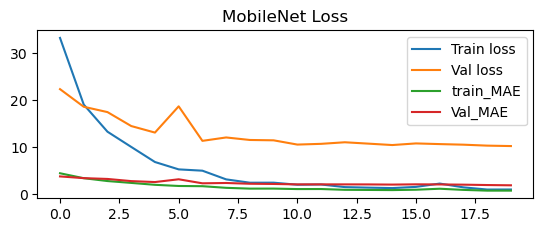

In [89]:
# plot loss during training
plt.subplot(211)
plt.title('MobileNet Loss')
plt.plot(model_historyA.history['loss'], label='Train loss')
plt.plot(model_historyA.history['val_loss'], label='Val loss')
plt.plot(model_historyA.history['mae'], label='train_MAE')
plt.plot(model_historyA.history['val_mae'], label='Val_MAE')
plt.legend()
plt.legend()


In [98]:
mobilNet_model.save('../model/MobileNet.h5')
vgg16_net_model.save('../model/VGG16.h5')